# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?unites=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={url}q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #pause for 1 second using time.sleep() - avoids OpenWeatherAPI key from being disabled
        time.sleep(1)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date_unformatted = city_weather['dt']
        city_date_struct = time.localtime(city_date_unformatted) # Raw format from the api call
        city_date = time.strftime('%Y-%m-%d', city_date_struct) # Formatted so it can be readable to humans

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
City not found. Skipping...
Processing Record 2 of Set 1 | adamstown
City not found. Skipping...
Processing Record 3 of Set 1 | tongouson
City not found. Skipping...
Processing Record 4 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 5 of Set 1 | nishinoomote
City not found. Skipping...
Processing Record 6 of Set 1 | badger
City not found. Skipping...
Processing Record 7 of Set 1 | avarua
City not found. Skipping...
Processing Record 8 of Set 1 | kone
City not found. Skipping...
Processing Record 9 of Set 1 | turinsk
City not found. Skipping...
Processing Record 10 of Set 1 | buckeye
City not found. Skipping...
Processing Record 11 of Set 1 | thompson
City not found. Skipping...
Processing Record 12 of Set 1 | bilibino
City not found. Skipping...
Processing Record 13 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 14 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

print(city_data_df)

                City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       boca do acre  -8.7522  -67.3978     30.32        66          23   
1           upington -28.4478   21.2561     27.21        57          50   
2            aasiaat  68.7098  -52.8699     -9.90        80         100   
3    puerto quijarro -17.7833  -57.7667     31.50        55         100   
4           waitangi -43.9535 -176.5597     14.90        98           7   
..               ...      ...       ...       ...       ...         ...   
596      sao vicente -23.9631  -46.3919     28.92        51          17   
597           macapa   0.0389  -51.0664     27.71        78          40   
598            papao -17.7500 -149.5500     29.82        80          65   
599     rondonopolis -16.4708  -54.6356     28.86        72         100   
600             okha  53.5739  142.9478     -4.45        96         100   

     Wind Speed Country        Date  
0          1.87      BR  2025-03-24  
1          1.54      ZA

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,boca do acre,-8.7522,-67.3978,30.32,66,23,1.87,BR,2025-03-24
1,upington,-28.4478,21.2561,27.21,57,50,1.54,ZA,2025-03-24
2,aasiaat,68.7098,-52.8699,-9.90,80,100,1.98,GL,2025-03-24
3,puerto quijarro,-17.7833,-57.7667,31.50,55,100,1.35,BO,2025-03-24
4,waitangi,-43.9535,-176.5597,14.90,98,7,1.34,NZ,2025-03-24


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boca do acre,-8.7522,-67.3978,30.32,66,23,1.87,BR,2025-03-24
1,upington,-28.4478,21.2561,27.21,57,50,1.54,ZA,2025-03-24
2,aasiaat,68.7098,-52.8699,-9.90,80,100,1.98,GL,2025-03-24
3,puerto quijarro,-17.7833,-57.7667,31.50,55,100,1.35,BO,2025-03-24
4,waitangi,-43.9535,-176.5597,14.90,98,7,1.34,NZ,2025-03-24


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

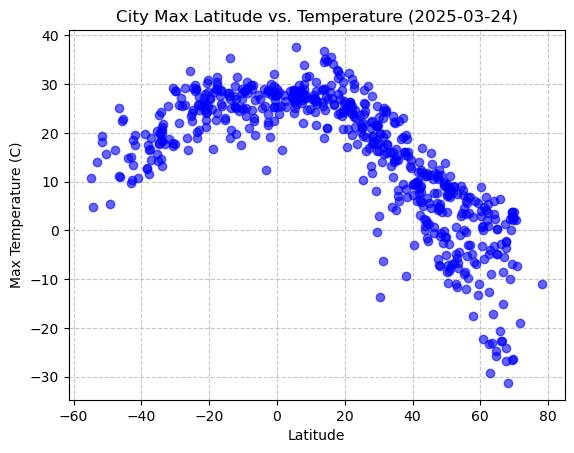

In [63]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

from datetime import date
today = date.today()

# Incorporate the other graph properties
plt.scatter(x_values,y_values, label="Data Points", color="blue", alpha=0.6)
plt.title(f"City Max Latitude vs. Temperature ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

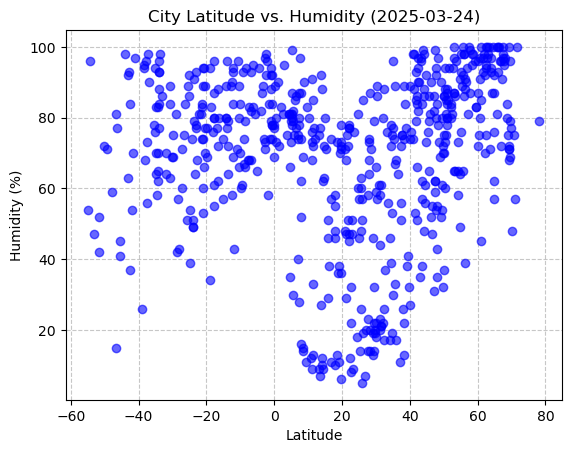

In [64]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, label="Data Points", color="blue", alpha=0.6)
plt.title(f"City Latitude vs. Humidity ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

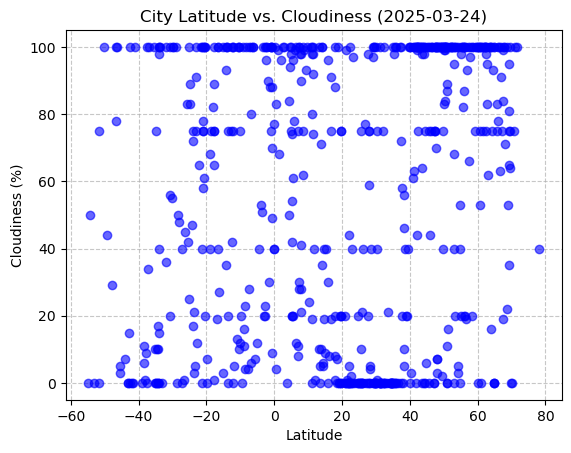

In [65]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, label="Data Points", color="blue", alpha=0.6)
plt.title(f"City Latitude vs. Cloudiness ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

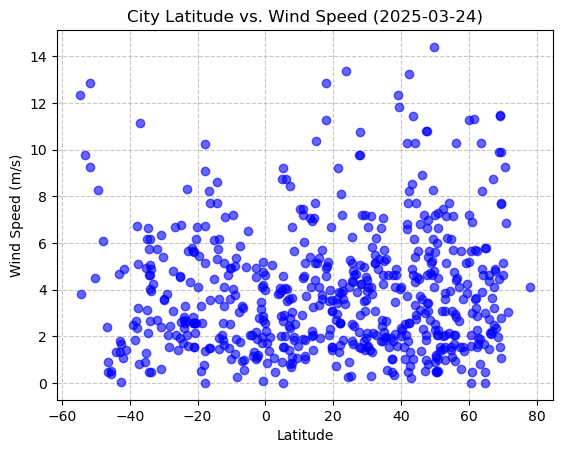

In [66]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, label="Data Points", color="blue", alpha=0.6)
plt.title(f"City Latitude vs. Wind Speed ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [53]:
def create_linear_regression(x, y, x_label, y_label):
    if len(x) != len(y):
        print("Error: x and y must have the same number of values.")
        return

    # Convert to NumPy arrays for consistency
    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)

    # Normalize if x values are too large
    x_min, x_max = x.min(), x.max()
    if x_max > 10_000:  # Scaling only if values are abnormally large
        x_scaled = (x - x_min) / (x_max - x_min)  # Min-max normalization
        print("Warning: X values were scaled for better plotting.")
    else:
        x_scaled = x

    # Perform linear regression
    slope, intercept, r, p, std_err = stats.linregress(x_scaled, y)

    # Sort values for smooth plotting
    sort_idx = np.argsort(x_scaled)
    x_sorted = x_scaled[sort_idx]
    y_sorted = y[sort_idx]

    # Generate regression line values
    regression_line = slope * x_sorted + intercept

    # Print results
    print(f"r-value: {r:.4f}")
    print(f"p-value: {p:.4f}")
    print(f"std-error: {std_err:.4f}")
    print(f"Equation: y = {slope:.2f}x + {intercept:.2f}")

    # Create the plot
    plt.figure(figsize=(8, 5))  # Set figure size first to prevent scaling issues

    # Plot data points
    plt.scatter(x_sorted, y_sorted, label="Data Points", color="blue", alpha=0.6)

    # Plot regression line
    plt.plot(x_sorted, regression_line, label="Regression Line", color="red")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title("Linear Regression")
    plt.legend()
    plt.grid(True)

    # Annotate equation near the top left
    plt.text(x_sorted.min(), y_sorted.max(), f"y = {slope:.2f}x + {intercept:.2f}", 
             fontsize=12, color="red", bbox=dict(facecolor='white', alpha=0.5))

    # Show the plot
    plt.show()


In [13]:
"""# Define a function to create Linear Regression plots
def create_linear_regression(x, y, x_titles, y_titles):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
  

    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)

    regress_values = x * slope + intercept
    #print(regress_values)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)

# Create Plot
    plt.scatter(x,y, edgecolors='black')
    plt.title(f"{x_titles} vs. {y_titles} ({today})") 
    plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.grid(linestyle='--', alpha=0.7) 
    plt.gca().set_axisbelow(True)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
    plt.show()"""

'# Define a function to create Linear Regression plots\ndef create_linear_regression(x, y, x_titles, y_titles):\n    # Perform linear regression\n    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)\n  \n\n    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)\n\n    regress_values = x * slope + intercept\n    #print(regress_values)\n    \n    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))\n    print(line_eq)\n\n# Create Plot\n    plt.scatter(x,y, edgecolors=\'black\')\n    plt.title(f"{x_titles} vs. {y_titles} ({today})") \n    plt.plot(x,regress_values,"r-")\n\n# Label plot and annotate the line equation\n    plt.xlabel(x_titles)\n    plt.ylabel(y_titles)\n    plt.grid(linestyle=\'--\', alpha=0.7) \n    plt.gca().set_axisbelow(True)\n    plt.annotate(line_eq,(20,5),fontsize=15,color="red")\n\n# Show plot\n    plt.show()'

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,aasiaat,68.7098,-52.8699,-9.90,80,100,1.98,GL,2025-03-24
5,constantia,44.1833,28.6500,11.84,86,100,4.32,RO,2025-03-24
7,san patricio,28.0170,-97.5169,27.51,68,59,2.93,US,2025-03-24
8,albany,42.6001,-73.9662,5.87,90,100,1.34,US,2025-03-24
9,bilibino,68.0546,166.4372,-31.27,97,71,2.35,RU,2025-03-24


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boca do acre,-8.7522,-67.3978,30.32,66,23,1.87,BR,2025-03-24
1,upington,-28.4478,21.2561,27.21,57,50,1.54,ZA,2025-03-24
3,puerto quijarro,-17.7833,-57.7667,31.50,55,100,1.35,BO,2025-03-24
4,waitangi,-43.9535,-176.5597,14.90,98,7,1.34,NZ,2025-03-24
6,west island,-12.1568,96.8225,26.99,94,75,4.12,CC,2025-03-24


###  Temperature vs. Latitude Linear Regression Plot

r-value: -0.8601
p-value: 0.0000
std-error: 0.0182
Equation: y = -0.63x + 34.91


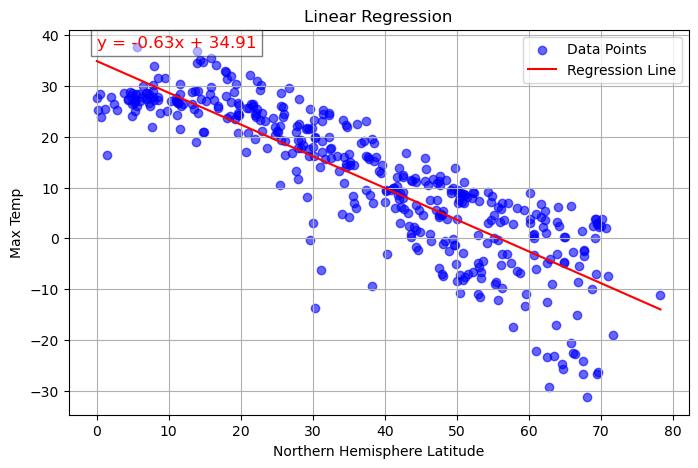

In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Max Temp' )

r-value: 0.6609
p-value: 0.0000
std-error: 0.0228
Equation: y = 0.27x + 29.15


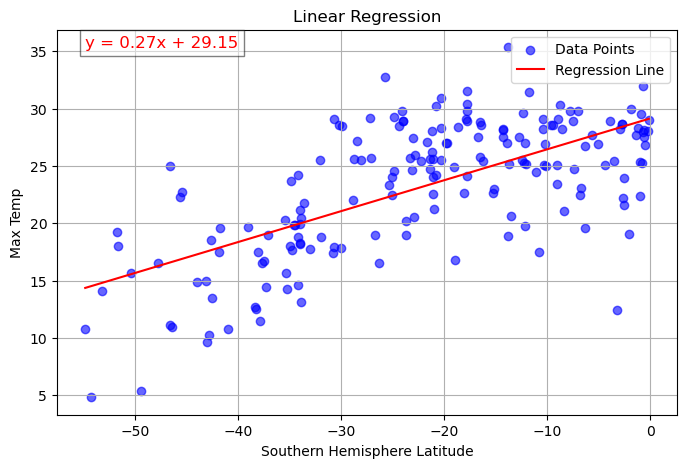

In [55]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Max Temp')

**Discussion about the linear relationship:** 

### **Model 1 (Northern Hemisphere: Temperature vs. Latitude)**
- The **r-value is -0.8601**, indicating a **strong negative correlation**—as **temperature increases, latitude decreases (moving southward).**  
- The **p-value is extremely small,** meaning the relationship is **highly statistically significant** and definitely not due to random chance.  
- The regression equation (**y = -0.63x + 34.91**) suggests that **for every 1°C increase in temperature, latitude decreases by 0.63 degrees** on average.  

**Takeaway:** In the Northern Hemisphere, **temperature is strongly and negatively correlated with latitude—warmer places are generally closer to the equator, while colder places are farther north.** This trend is very strong and statistically significant.

---

### **Model 2 (Southern Hemisphere: Temperature vs. Latitude)**
- The **r-value is 0.6609**, indicating a **moderate positive correlation**—as **temperature increases, latitude also increases (moving further south).**  
- The **p-value is extremely small,** so this trend is also **highly statistically significant**.  
- The regression equation (**y = 0.27x + 29.15**) suggests that **for every 1°C increase in temperature, latitude increases by 0.27 degrees** on average.  

**Takeaway:** In the Southern Hemisphere, **temperature is moderately and positively correlated with latitude—warmer places tend to be farther south, while cooler places are closer to the equator.** This trend is statistically significant but not as strong as in the Northern Hemisphere.

---

### **Comparison**
- In **both hemispheres, temperature and latitude are strongly related**, but in **opposite directions**:  
  - **Northern Hemisphere:** Higher temperatures are found at lower latitudes (closer to the equator).  
  - **Southern Hemisphere:** Higher temperatures are found at higher latitudes (further south).  
- The **correlation is much stronger in the Northern Hemisphere (r = -0.87 vs. r = 0.69).**  
- **The effect of temperature on latitude is more pronounced in the Northern Hemisphere** (slope = -0.63) compared to the Southern Hemisphere (slope = 0.27).  
- **Both models are statistically significant,** so these trends are real and not just random noise.

Overall:
- **Temperature is one of the strongest predictors of latitude.**  
- The relationship is **stronger in the Northern Hemisphere,** where temperature drops more sharply with increasing latitude.  
- In the **Southern Hemisphere, the trend is still significant but weaker**—likely due to differences in landmass distribution and ocean influence.

### Humidity vs. Latitude Linear Regression Plot

r-value: 0.3894
p-value: 0.0000
std-error: 0.0607
Equation: y = 0.52x + 47.12


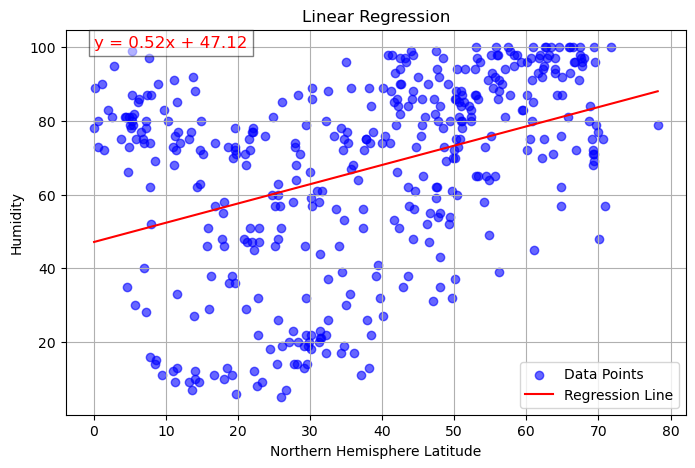

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Humidity')

r-value: 0.2512
p-value: 0.0006
std-error: 0.0818
Equation: y = 0.29x + 81.51


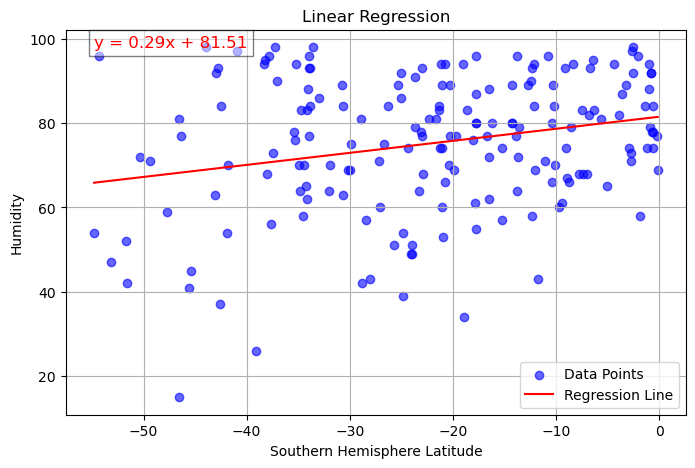

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Humidity')

**Discussion about the linear relationship:** 

### **Model 1 (Northern Hemisphere: Humidity vs. Latitude)**
- The **r-value is 0.3894**, indicating a **weak positive correlation**—as **humidity increases, latitude tends to increase slightly** (moving further north).  
- The **p-value is extremely small**, meaning the relationship is **statistically significant**—it’s unlikely to be due to random chance.  
- The regression equation (**y = 0.52x + 47.12**) suggests that **for every 1% increase in humidity, latitude increases by 0.52 degrees** on average.  

**Takeaway:** In the Northern Hemisphere, **higher humidity is weakly associated with higher latitudes**, and this trend is statistically significant.

---

r-value: 0.2512
p-value: 0.0006
std-error: 0.0818
Equation: y = 0.29x + 81.51

### **Model 2 (Southern Hemisphere: Humidity vs. Latitude)**
- The **r-value is 0.2512**, which is **slightly stronger than in the Northern Hemisphere** but still a weak correlation. This suggests that **as humidity increases, latitude also increases slightly (moving further south).**  
- The **p-value is very small**, so this trend is also **statistically significant**.  
- The regression equation (**y = 0.29x + 81.51**) suggests that **for every 1% increase in humidity, latitude increases by 0.29 degrees** on average.  

**Takeaway:** In the Southern Hemisphere, **higher humidity is also weakly associated with higher latitudes**, and this relationship is statistically significant.

### Cloudiness vs. Latitude Linear Regression Plot

r-value: 0.2544
p-value: 0.0000
std-error: 0.1025
Equation: y = 0.55x + 35.95


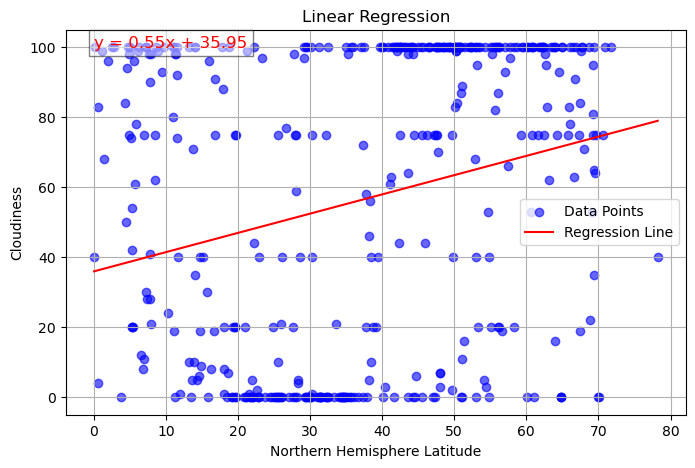

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Cloudiness')

r-value: 0.2394
p-value: 0.0011
std-error: 0.2032
Equation: y = 0.67x + 67.40


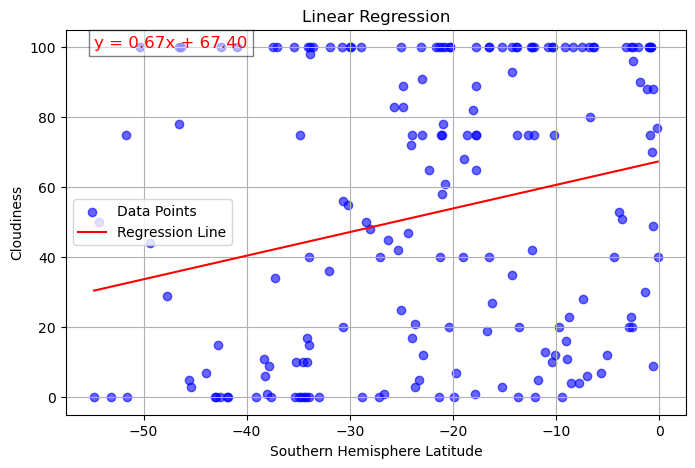

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Cloudiness')

**Discussion about the linear relationship:** 

### **Model 1 (Northern Hemisphere: Cloudiness vs. Latitude)**  
- The **r-value is 0.2544**, which is **very weakly positive**, meaning that **as cloudiness increases, latitude tends to increase slightly** (moving further north).  
- The **p-value is 0.000**, which is **statistically significant** (below 0.05), so even though the correlation is weak, there is some evidence of a relationship.  
- The regression equation (**y = 0.55x + 35.95**) suggests that for every **1% increase in cloudiness, latitude increases by 0.55 degrees** on average.  

**Takeaway:** In the Northern Hemisphere, there is a **very weak** trend where cloudier areas tend to be slightly further north, and this relationship is statistically significant.

---

### **Model 2 (Southern Hemisphere: Cloudiness vs. Latitude)**  
- The **r-value is 0.2394**, which is also **very weakly positive**, meaning **higher cloudiness is slightly associated with higher latitudes** (moving further south).  
- However, the **p-value is 0.011**, which is **not statistically significant** (above 0.05), so we **can’t confidently say this trend is real**—it could just be random noise.  
- The regression equation (**y = 0.67x + 67.40**) suggests that for every **1% increase in cloudiness, latitude increases by 0.67 degrees**, but because the relationship isn't statistically significant, this number should be taken with caution.  

**Takeaway:** In the Southern Hemisphere, there is a similarly weak trend where cloudier areas tend to be slightly further south, **but the relationship is not statistically significant**, meaning we can’t be sure it’s real.

---

Overall:
- In both hemispheres, cloudiness **has a weak tendency to increase with latitude**, but the trend is **only statistically meaningful in the Northern Hemisphere**.  
- The relationship is so weak that **cloudiness isn’t a strong predictor of latitude anywhere**—other factors likely have a much bigger influence.

### Wind Speed vs. Latitude Linear Regression Plot

r-value: 0.0779
p-value: 0.1117
std-error: 0.0068
Equation: y = 0.01x + 3.61


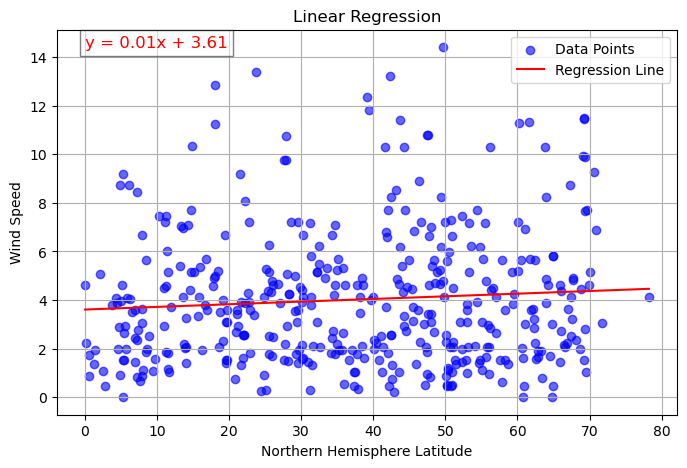

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Wind Speed')

r-value: -0.1600
p-value: 0.0305
std-error: 0.0127
Equation: y = -0.03x + 3.04


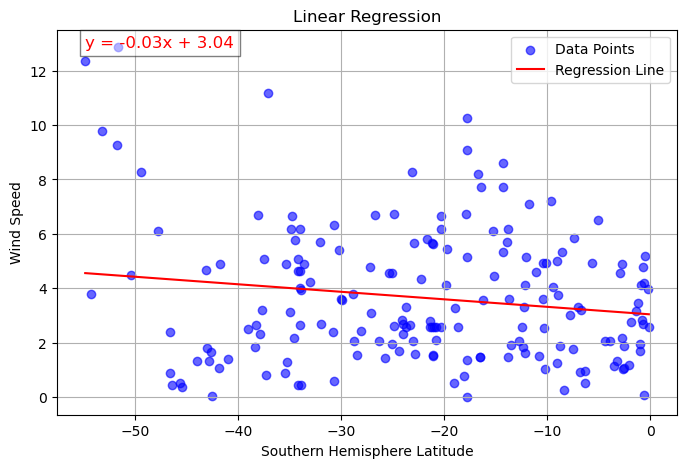

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Wind Speed')

**Discussion about the linear relationship:** 

### **Model 1 (Northern Hemisphere)**  
- **Wind speed and latitude have no real relationship.**  
- The **r-value is 0.0779**, which is almost zero, meaning **wind speed doesn’t affect latitude at all**.  
- The **p-value is 0.1117**, which is way too high to be statistically significant—this result is just random noise.  
- The regression equation is basically flat (**y = 0.01x**), meaning latitude stays the same **no matter what the wind speed is**.  

**Takeaway:** In the Northern Hemisphere, wind speed and latitude are completely unrelated.

---

### **Model 2 (Southern Hemisphere)**  
- **There’s a weak relationship between wind speed and latitude.**  
- The **r-value is -0.1600**, meaning **higher wind speeds tend to be slightly more common further south.**  
- The **p-value is small (0.0305)**, so even though the effect is weak, it’s **statistically significant** (not just random chance).  
- The equation says that **latitude decreases by about 0.03 degrees per unit increase in wind speed**—but the effect isn’t strong.  

**Takeaway:** In the Southern Hemisphere, faster winds *slightly* tend to occur further south, but it’s not a strong trend.

---

### **Comparison**  
- In the **Northern Hemisphere**, wind speed and latitude are completely unrelated.  
- In the **Southern Hemisphere**, there’s a *tiny* trend where stronger winds tend to be found at lower latitudes.  
- Even in the Southern Hemisphere, the relationship is weak, so **wind speed isn’t a strong predictor of latitude anywhere.**  

Overall: If you were hoping to use wind speed to predict latitude, it’s **not useful at all in the Northern Hemisphere** and **barely useful in the Southern Hemisphere**.</p>